3113 459.1072920012849


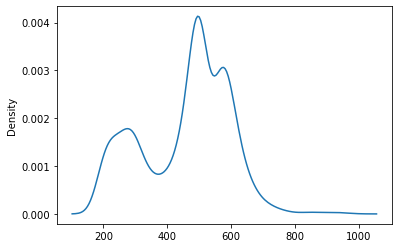

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pub = pd.read_csv('../topic_test/pub.log', sep=' ', index_col=0, names=['timestamp'])
sub = pd.read_csv('../topic_test/sub.log', sep=' ', index_col=0, names=['timestamp'])

latency = []
for i, r in sub.iterrows():
    latency.append(sub.loc[i,'timestamp'] - pub.loc[i,'timestamp'])
latency = np.array(latency)
latency = np.extract(latency<1000, latency)

print(latency.shape[0], np.average(latency))
sns.distplot(latency, hist=False)

2786 1060.1877243359656
2790 523.1931899641577


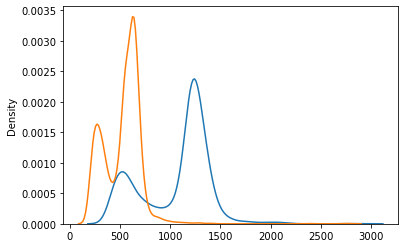

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pub = pd.read_csv('../topic_test/pub_n0.log', sep=' ', index_col=0, names=['timestamp'])
sub0 = pd.read_csv('../topic_test/sub_n0.log', sep=' ', index_col=0, names=['timestamp'])
sub1 = pd.read_csv('../topic_test/sub_n1.log', sep=' ', index_col=0, names=['timestamp'])
sub2 = pd.read_csv('../topic_test/sub_n2.log', sep=' ', index_col=0, names=['timestamp'])

max_latency = []
min_latency = []
for i, r in pub.iterrows():
    max_latency.append(max([sub0.loc[i,'timestamp'], sub1.loc[i,'timestamp'], sub2.loc[i,'timestamp']]) - pub.loc[i,'timestamp'])
    min_latency.append(min([sub0.loc[i,'timestamp'], sub1.loc[i,'timestamp'], sub2.loc[i,'timestamp']]) - pub.loc[i,'timestamp'])
max_latency = np.array(max_latency)
min_latency = np.array(min_latency)
max_latency = np.extract(max_latency<3000, max_latency)
min_latency = np.extract(min_latency<3000, min_latency)

print(max_latency.shape[0], np.average(max_latency))
sns.distplot(max_latency, hist=False)
print(min_latency.shape[0], np.average(min_latency))
sns.distplot(min_latency, hist=False)

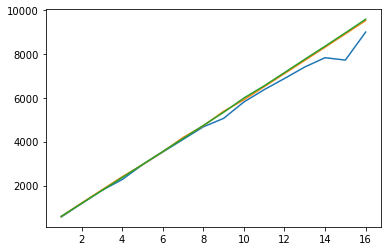

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.loadtxt('../topic_test/throughput_1ms.txt')
t10 = np.loadtxt('../topic_test/throughput_10ms.txt')
t100 = np.loadtxt('../topic_test/throughput_100ms.txt')
t1 = t1 / 100
t10 = t10 / 10
n = np.arange(1, 17)

plt.plot(n, t1)
plt.plot(n, t10)
plt.plot(n, t100)
plt.show()

9902


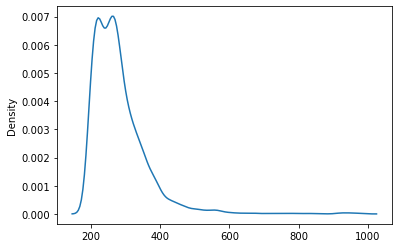

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rtt = pd.read_csv('../service_test/client.log').to_numpy()
rtt = np.extract(rtt<1000, rtt)
print(rtt.shape[0])
sns.distplot(rtt, hist=False)